<a href="https://colab.research.google.com/github/MateoLopez00/AMO-Project/blob/main/AMO_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMO Project Orchestration

*   **Input**: *A piano MIDI file.*
*   **Processing**: *Extracts features, segments layers, assigns instruments, and limits ranges.*
*   **Output**: *A fully orchestrated MIDI file with metrics for quality evaluation.*
*   **Visualization**: *Plots to illustrate the orchestration structure and complexity.*

# To do


*   Compare meter outputs of both libraries



## Orchestration With Music21

In [ ]:
!pip install music21

# Install required libraries
!pip install pretty_midi numpy matplotlib partitura

# Remove existing directory and re-clone the repository
!rm -rf /content/AMO-Project
!git clone --branch Feature_Music21 https://github.com/MateoLopez00/AMO-Project.git

# Add the functions folder to sys.path
import sys
sys.path.append('/content/AMO-Project/functions')

Cloning into 'AMO-Project'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 261 (delta 20), reused 31 (delta 14), pack-reused 222 (from 1)
Receiving objects: 100% (261/261), 468.76 KiB | 13.79 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [ ]:
# Define instrument combos
instrument_combos = {
  "combo1": {
      "melody": [
          ("Violin", 55, 103),
          ("Viola", 48, 85)
      ],
      "harmony": [
          ("Cello", 36, 70),
          ("Bassoon", 34, 68)
      ],
      "rhythm": [
          ("Timpani", 29, 51),
          ("Contrabass", 20, 60)
      ],
  },
  "combo2": {
      "melody": [
          ("Flute", 60, 96),
          ("Oboe", 58, 90)
      ],
      "harmony": [
          ("Clarinet", 48, 72),
          ("French Horn", 36, 65)
      ],
      "rhythm": [
          ("Trumpet", 58, 90),
          ("Bassoon", 34, 68)
      ],
  }
}

In [ ]:
# Import necessary modules
import pretty_midi
from midi_processing import extract_midi_features, get_meter
from visualization import plot_piano_roll, plot_polyphony
from segmentation import segment_layers
from orchestration import create_and_assign_instruments_dynamic  # Use the new function
from evaluation import evaluate_orchestration, pitch_class_entropy, scale_consistency, average_polyphony
import warnings
warnings.filterwarnings('ignore')

# Main workflow
piano_midi_path = "/content/AMO-Project/examples/Rhapsody-in-G-Minor-Opus-79-Nr-2.mid"
predicted_orchestration_midi_path = "orchestration_dynamic.mid"

# Load and process MIDI using music21-based functions
piano_notes = extract_midi_features(piano_midi_path)

# Extract meter (time signatures)
meters = get_meter(piano_midi_path)
print("Meters (Time Signatures):", meters)

# Segment layers (simple segmentation by pitch)
melody, harmony, rhythm = segment_layers(piano_notes)

# Prepare layer_notes as a dictionary mapping layer names to note lists.
layer_notes = {
    "melody": melody,
    "harmony": harmony,
    "rhythm": rhythm,
}

# Assign notes to instruments dynamically based on beat.
# Here combo1 is used for the first 16 beats of each cycle, combo2 for the next 8.
instruments, orchestration_notes = create_and_assign_instruments_dynamic(
    layer_notes,
    instrument_combos,
    combo1_duration=16,
    combo2_duration=8
)

# Save the orchestration MIDI file.
orchestral_midi = pretty_midi.PrettyMIDI()
orchestral_midi.instruments.extend(instruments)
orchestral_midi.write(predicted_orchestration_midi_path)

# For evaluation, we need to build instrument_ranges.
# Since instrument names are now suffixed with layer and combo,
# we build ranges for each.
instrument_ranges = {}
instrument_ranges = {}
for combo_id, combo in instrument_combos.items():
    for layer, inst_list in combo.items():
        for inst_info in inst_list:
            if len(inst_info) == 3:
                inst_name, min_pitch, max_pitch = inst_info
                key = f"{inst_name}_{layer}_{combo_id}"
                instrument_ranges[key] = (min_pitch, max_pitch)

evaluation_results = evaluate_orchestration(piano_notes, orchestration_notes, instrument_ranges)
print("Evaluation Results:", evaluation_results)

# Additional evaluations.
entropy = pitch_class_entropy(predicted_orchestration_midi_path)
print(f"Pitch Class Entropy: {entropy:.2f}")
scale_consistency_score = scale_consistency(predicted_orchestration_midi_path)
print(f"Scale Consistency: {scale_consistency_score:.2f}")
avg_polyphony = average_polyphony(predicted_orchestration_midi_path)
print(f"Average Polyphony: {avg_polyphony:.2f}")

Meters (Time Signatures): [{'numerator': 4, 'denominator': 4, 'time_in_beats': 0.0}]
Evaluation Results: {'Pitch Coverage': 1.0, 'Timing Accuracy': 1.0, 'Range Appropriateness': 1.0}
Pitch Class Entropy: 3.26
Scale Consistency: 0.71
Average Polyphony: 5.06


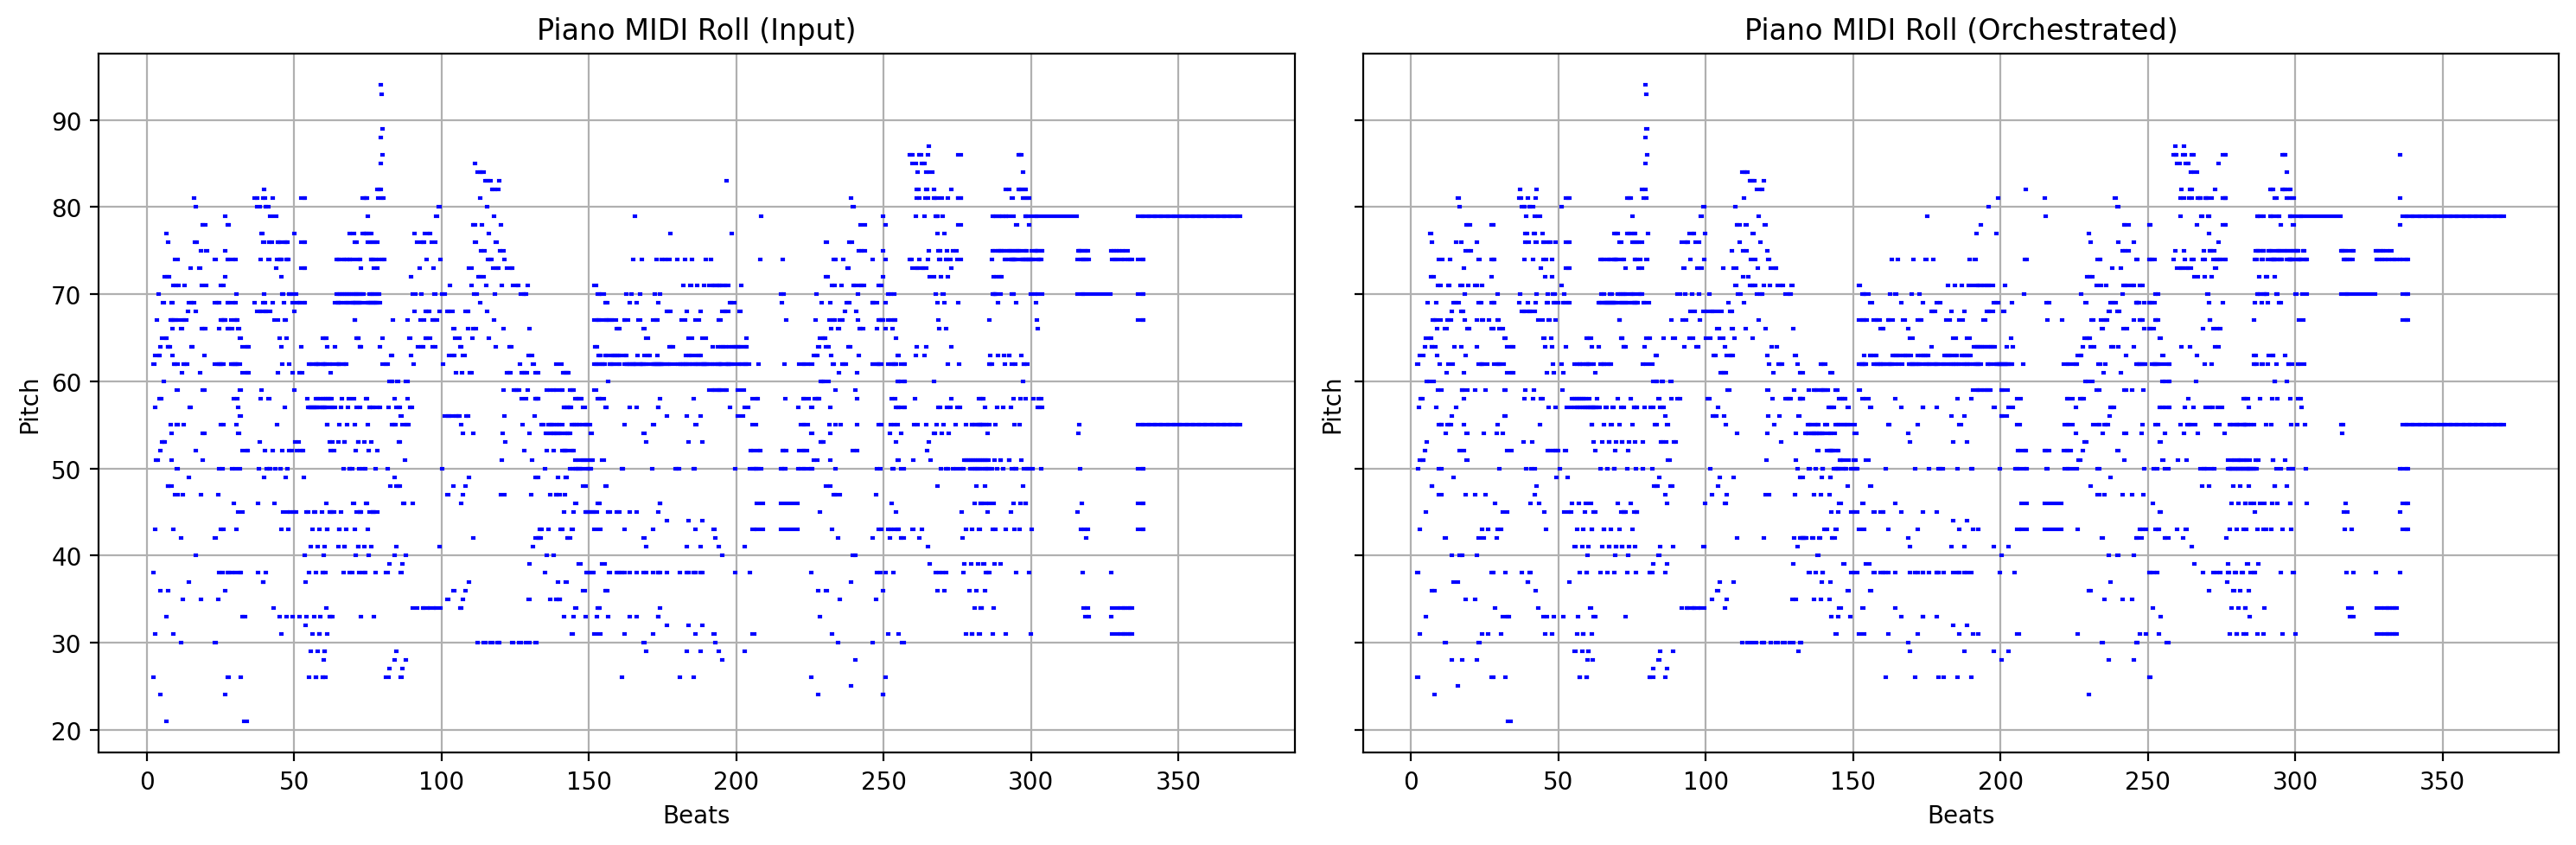

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side,
# and force both subplots to share the same x and y axes.
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

# Plot the piano roll for the input MIDI file on the first subplot.
plot_piano_roll(piano_notes, title="Piano MIDI Roll (Input)", ax=axs[0])

# Plot the piano roll for the orchestrated output on the second subplot.
plot_piano_roll(orchestration_notes, title="Piano MIDI Roll (Orchestrated)", ax=axs[1])

# Optionally, if you want to force a particular axis range (for example):
# axs[0].set_xlim(0, max_x_value)
# axs[0].set_ylim(min_y_value, max_y_value)
# axs[1].set_xlim(0, max_x_value)
# axs[1].set_ylim(min_y_value, max_y_value)

plt.tight_layout()  # Adjust layout so labels and titles don't overlap.
plt.show()


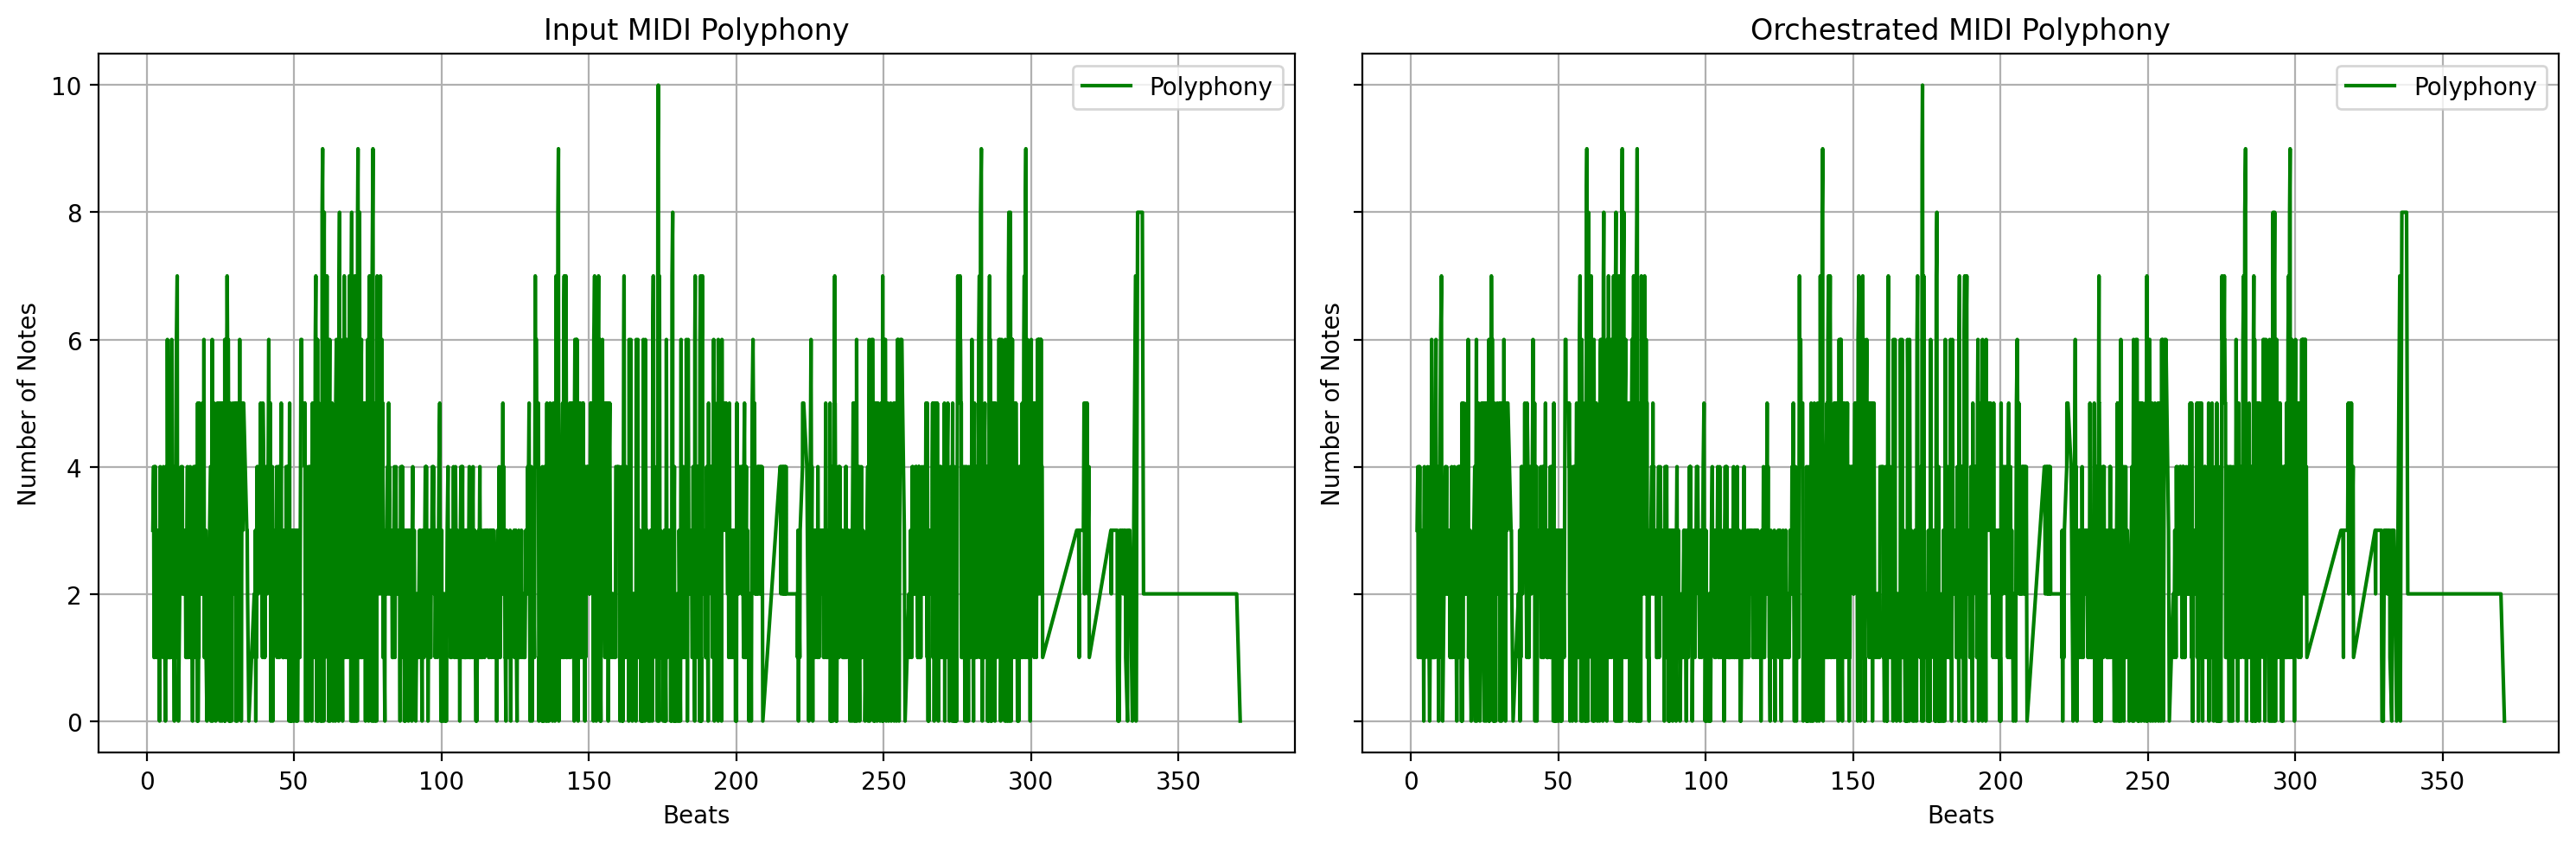

In [ ]:
# Create a figure with two subplots that share the same x and y axes.
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)

# Plot the polyphony for the input MIDI on the first subplot.
plot_polyphony(piano_notes, title="Input MIDI Polyphony", ax=axs[0])

# Plot the polyphony for the orchestrated result on the second subplot.
plot_polyphony(orchestration_notes, title="Orchestrated MIDI Polyphony", ax=axs[1])

plt.tight_layout()
plt.show()

## Previous Metrics:

* Meters (Time Signatures): [{'numerator': 4, 'denominator': 4, 'time_in_beats': 0.0}]
* Evaluation Results: Pitch Coverage: 0.9275, Timing Accuracy: 0.9844, Range Appropriateness: 1.0
* Pitch Class Entropy: 3.27
* Scale Consistency: 0.71
* Average Polyphony: 2.63
## Current Metrics:
*   Meters (Time Signatures): [{'numerator': 4, 'denominator': 4, 'time_in_beats': 0.0}]
* Evaluation Results: Pitch Coverage: 1.0, Timing Accuracy: 1.0, Range Appropriateness: 1.0
* Pitch Class Entropy: 3.27
* Scale Consistency: 0.71
* Average Polyphony: 2.67

